In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm


def run():
    src_image_path = "../app/assets/image-enhancement/original"
    output_path_lr = "../app/assets/image-enhancement/lr"
    output_path_hr = "../app/assets/image-enhancement/hr"
    output_path_upscaled = "../app/assets/image-enhancement/upscaled"
    src_images = sorted(glob(os.path.join(src_image_path, "*.png")))
    crop_h, crop_w = (128, 128)
    scaling_factor = 4
    filter_names = [
        "NEAREST",
        "BILINEAR",
        "BICUBIC",
        "HAMMING",
        "BOX",
        "LANCZOS",
    ]
    filters = [
        Image.NEAREST,
        Image.BILINEAR,
        Image.BICUBIC,
        Image.HAMMING,
        Image.BOX,
        Image.LANCZOS,
    ]
    cols = ["Original", "HR (128x128)", "LR (32x32)"] + filter_names

    fig, axes = plt.subplots(
        nrows=len(src_images),
        ncols=len(filters) + 3,
        figsize=(3 * len(filters), 2 * len(src_images)),
        constrained_layout=True,
    )

    for ax, col in zip(axes[0], cols):
        ax.set_title(col)

    for i, src_image_path in tqdm(enumerate(src_images)):
        basename = os.path.basename(src_image_path)
        hr = Image.open(src_image_path)

        w, h = hr.size

        left = (w - crop_w) / 2
        top = (h - crop_h) / 2
        right = (w + crop_w) / 2
        bottom = (h + crop_h) / 2

        crop = hr.crop((left, top, right, bottom))
        crop.save(os.path.join(output_path_hr, f"HR-{basename}"))

        lr = crop.resize(
            (crop_w // scaling_factor, crop_h // scaling_factor), Image.BICUBIC
        )
        lr.save(os.path.join(output_path_lr, f"LR-{basename}"))

        axes[i][0].imshow(hr)
        axes[i][1].imshow(crop)
        axes[i][2].imshow(lr)

        j = 3

        for filter, filter_name in zip(filters, filter_names):
            upscaled = lr.resize((crop_h, crop_w), filter)
            upscaled.save(
                os.path.join(output_path_upscaled, f"{filter_name}-{basename}")
            )

            axes[i][j].imshow(upscaled)

            j = j + 1

    fig.suptitle(
        f"Comparison of different upscaling filters from PILLOW library (4x upscale factor)"
    )
    plt.savefig(os.path.join(output_path_upscaled, "comparison_fig.png"))
    plt.show()

15it [00:00, 24.54it/s]


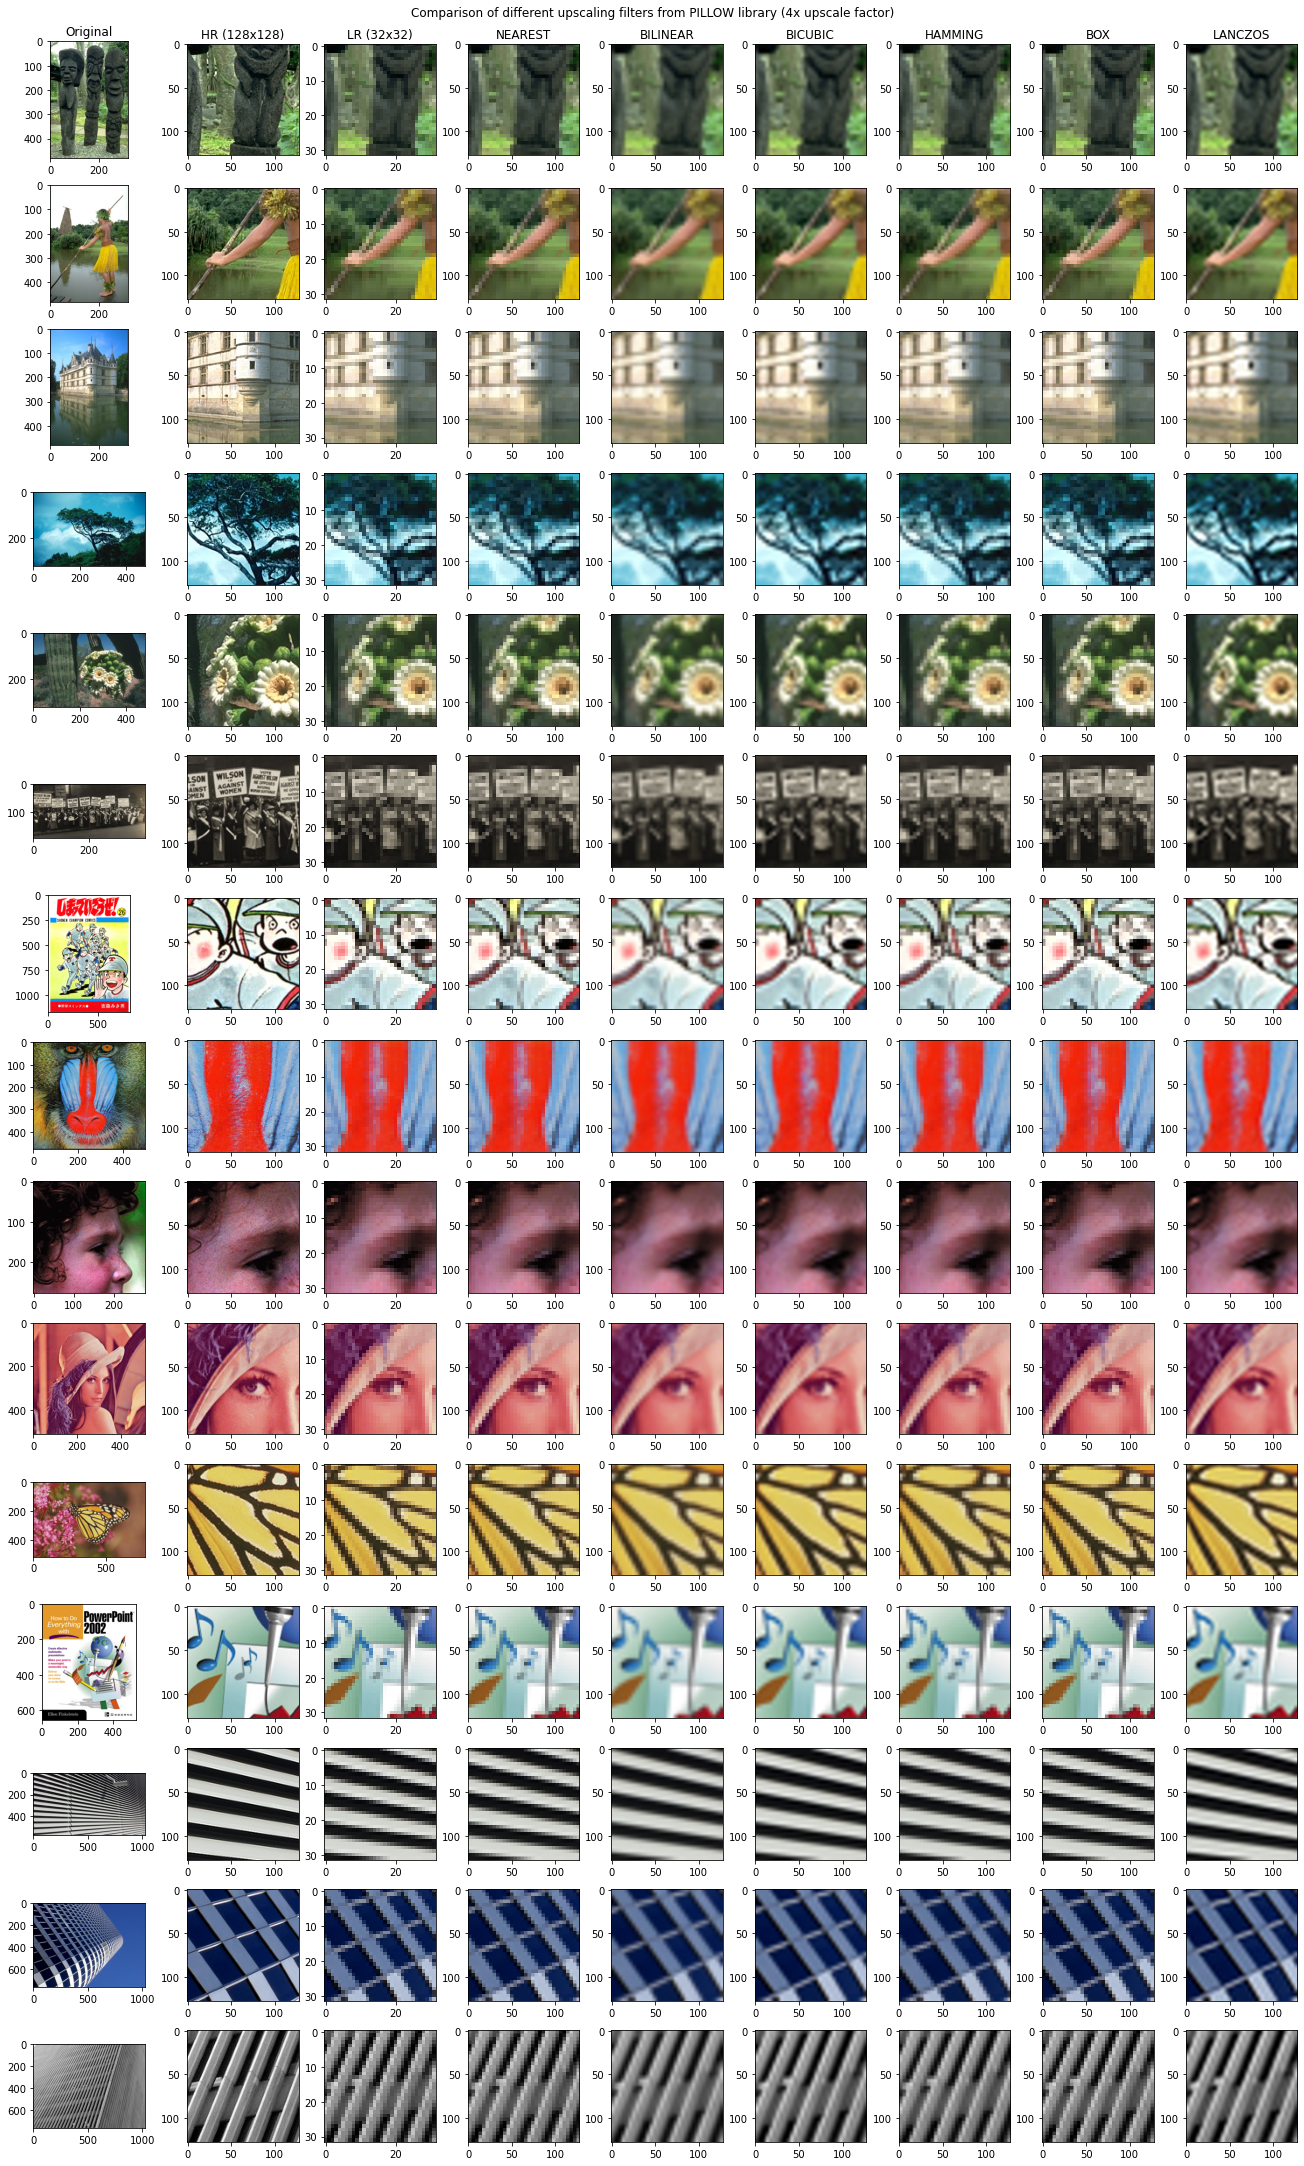

In [2]:
run()